In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [3]:
sample = pd.read_csv("../input/sample_submission.csv")
sample

,row_id,target
0,0-4,0.003048
1,0-32,0.003048
2,0-34,0.003048


In [4]:
test = pd.read_csv("../input/test.csv")
test

,stock_id,time_id,row_id
0,0,4,0-4
1,0,32,0-32
2,0,34,0-34


In [5]:
book_testparquet = pd.read_parquet("../input/book_test.parquet/stock_id=0")
book_testparquet

,time_id,seconds_in_bucket,bid_price1,ask_price1,bid_price2,ask_price2,bid_size1,ask_size1,bid_size2,ask_size2
0,4,0,1.000049,1.000590,0.999656,1.000639,91,100,100,24
1,4,1,1.000049,1.000590,0.999656,1.000639,91,100,100,20
2,4,5,1.000049,1.000639,0.999656,1.000885,290,20,101,15


In [6]:
train = pd.read_csv("../input/train.csv")
train

,stock_id,time_id,target
0,0,5,0.004136
1,0,11,0.001445
2,0,16,0.002168
3,0,31,0.002195
4,0,62,0.001747
...,...,...,...
428927,126,32751,0.003461
428928,126,32753,0.003113
428929,126,32758,0.004070
428930,126,32763,0.003357


In [7]:
book_example = pd.read_parquet('../input/book_train.parquet/stock_id=0')
book_example

,time_id,seconds_in_bucket,bid_price1,ask_price1,bid_price2,ask_price2,bid_size1,ask_size1,bid_size2,ask_size2
0,5,0,1.001422,1.002301,1.001370,1.002353,3,226,2,100
1,5,1,1.001422,1.002301,1.001370,1.002353,3,100,2,100
2,5,5,1.001422,1.002301,1.001370,1.002405,3,100,2,100
3,5,6,1.001422,1.002301,1.001370,1.002405,3,126,2,100
4,5,7,1.001422,1.002301,1.001370,1.002405,3,126,2,100
...,...,...,...,...,...,...,...,...,...,...
917548,32767,568,0.998275,0.998754,0.997796,0.998946,90,90,48,28
917549,32767,569,0.998275,0.998754,0.997892,0.998946,91,90,200,28
917550,32767,571,0.998275,0.998754,0.997892,0.998946,91,90,100,28
917551,32767,572,0.998275,0.998754,0.997892,0.998946,92,90,100,28


# columnsの解釈

Bid（売値） は、買い手が株を買う上で希望する価格
Ask（買値）は、売り手が株を売る上で希望する価格

stock_id : 株の銘柄（どの株か）

time_id : どの時間の情報かのid (submissionファイルのtime_idと連動しています)

seconds_in_bucket : time_idの中で、0からスタートして何秒後か。たぶん予測するのは、10分のtotalなので、seconds_in_bucketは、最大600 secのはず

bid_price1,2 : 株の買値の希望値の１番目と２番目 ※　(Normalized prices of the most/second most competitive buy level. だから、正確には、１番と２番目に正規化されたレベルの買値。
→買値の希望値をみんな出しているけど、それの正規化したときに一番多い値と２番目に多い値と推測。以下askも逆の現象。)

ask_price1,2 : 株の売り値の希望値

bid_size1,2 : 買うのを希望している側の１番目と２番目の株式数

ask_size1,2 : 売るのを希望している側の１番目と２番目の株式数


In [8]:
trade_example = pd.read_parquet("../input/trade_train.parquet/stock_id=0")
trade_example

,time_id,seconds_in_bucket,price,size,order_count
0,5,21,1.002301,326,12
1,5,46,1.002778,128,4
2,5,50,1.002818,55,1
3,5,57,1.003155,121,5
4,5,68,1.003646,4,1
...,...,...,...,...,...
123438,32767,471,0.998659,200,3
123439,32767,517,0.998515,90,1
123440,32767,523,0.998563,1,1
123441,32767,542,0.998803,90,4


In [9]:
for col in train.columns:
    print(f'{col}:{len(train[col].unique())}')

stock_id:112
time_id:3830
target:414287


# 株ごとの統計量

In [12]:
temp = train.groupby('stock_id')['target'].agg(["mean","median","std","count","sum"]).reset_index()
temp

,stock_id,mean,median,std,count,sum
0,0,0.004028,0.003180,0.002855,3830,15.429071
1,1,0.004362,0.003719,0.002433,3830,16.704962
2,2,0.002385,0.001748,0.002339,3830,9.133223
3,3,0.006182,0.005422,0.003201,3830,23.675414
4,4,0.004197,0.003397,0.002879,3830,16.073408
...,...,...,...,...,...,...
107,122,0.003762,0.003176,0.002300,3830,14.407997
108,123,0.002506,0.001967,0.001816,3830,9.599594
109,124,0.003691,0.003143,0.001953,3830,14.135579
110,125,0.002016,0.001575,0.001703,3830,7.719409


In [14]:
print(f'mean_value={temp["mean"].mean()}')


mean_value=0.0038805243039130325


(array([ 5., 25., 25., 22., 18.,  8.,  3.,  4.,  1.,  1.]),
 array([0.00147492, 0.00219811, 0.0029213 , 0.00364449, 0.00436768,
        0.00509087, 0.00581406, 0.00653724, 0.00726043, 0.00798362,
        0.00870681]),
 <BarContainer object of 10 artists>)

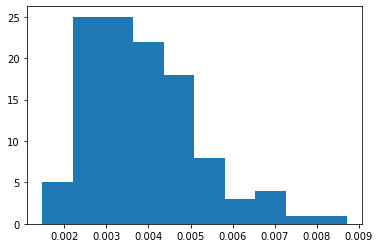

In [21]:
plt.hist(temp["mean"])

# stock id = 0のtime_id = 5の10分間のふるまい

In [22]:
book_example

,time_id,seconds_in_bucket,bid_price1,ask_price1,bid_price2,ask_price2,bid_size1,ask_size1,bid_size2,ask_size2
0,5,0,1.001422,1.002301,1.001370,1.002353,3,226,2,100
1,5,1,1.001422,1.002301,1.001370,1.002353,3,100,2,100
2,5,5,1.001422,1.002301,1.001370,1.002405,3,100,2,100
3,5,6,1.001422,1.002301,1.001370,1.002405,3,126,2,100
4,5,7,1.001422,1.002301,1.001370,1.002405,3,126,2,100
...,...,...,...,...,...,...,...,...,...,...
917548,32767,568,0.998275,0.998754,0.997796,0.998946,90,90,48,28
917549,32767,569,0.998275,0.998754,0.997892,0.998946,91,90,200,28
917550,32767,571,0.998275,0.998754,0.997892,0.998946,91,90,100,28
917551,32767,572,0.998275,0.998754,0.997892,0.998946,92,90,100,28


In [23]:
book_test = book_example[book_example["time_id"]==5]
book_test

,time_id,seconds_in_bucket,bid_price1,ask_price1,bid_price2,ask_price2,bid_size1,ask_size1,bid_size2,ask_size2
0,5,0,1.001422,1.002301,1.001370,1.002353,3,226,2,100
1,5,1,1.001422,1.002301,1.001370,1.002353,3,100,2,100
2,5,5,1.001422,1.002301,1.001370,1.002405,3,100,2,100
3,5,6,1.001422,1.002301,1.001370,1.002405,3,126,2,100
4,5,7,1.001422,1.002301,1.001370,1.002405,3,126,2,100
...,...,...,...,...,...,...,...,...,...,...
297,5,585,1.003129,1.003749,1.003025,1.003801,100,3,26,3
298,5,586,1.003129,1.003749,1.002612,1.003801,100,3,2,3
299,5,587,1.003129,1.003749,1.003025,1.003801,100,3,26,3
300,5,588,1.003129,1.003749,1.002612,1.003801,100,3,2,3


# 価格変動 (個別 + 全体を重ねたもの)

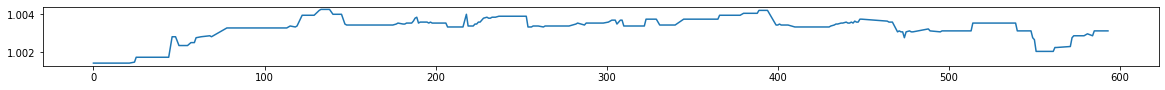

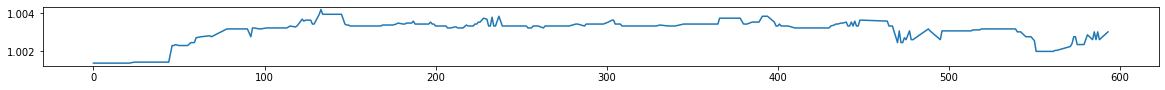

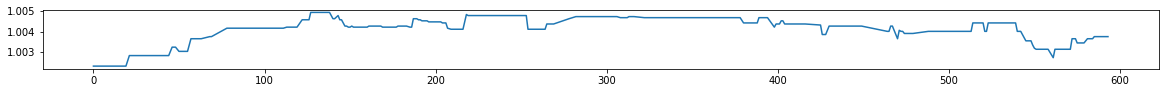

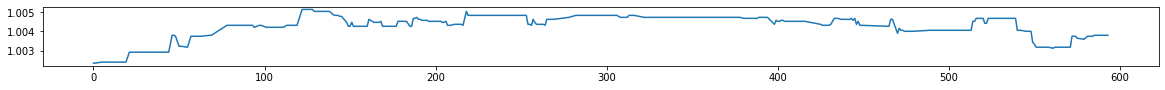

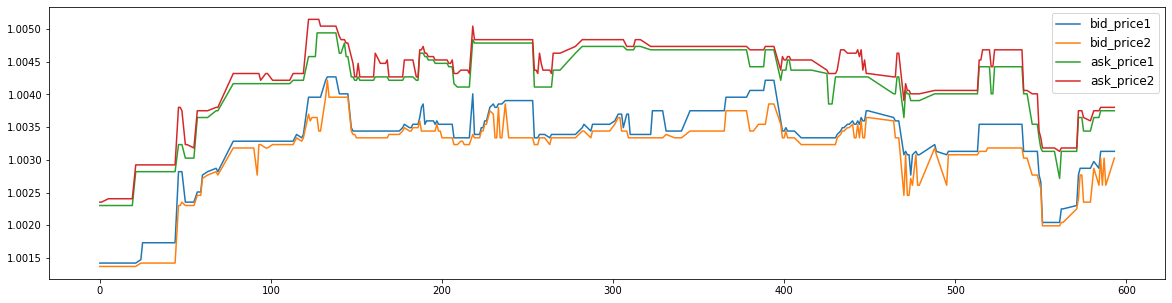

In [26]:
samples = ['bid_price1','bid_price2','ask_price1','ask_price2']
for i,a in enumerate(samples):
    plt.figure(figsize=(20,5))
    plt.subplot(4,1,i+1)
    plt.plot(book_test['seconds_in_bucket'],book_test[a])

plt.show()
plt.figure(figsize=(20,5))

for i,a in enumerate(samples):
    plt.plot(book_test['seconds_in_bucket'],book_test[a],label=a)

plt.legend(fontsize=12)

## 実際の取引情報の追加

In [27]:
trade_example

,time_id,seconds_in_bucket,price,size,order_count
0,5,21,1.002301,326,12
1,5,46,1.002778,128,4
2,5,50,1.002818,55,1
3,5,57,1.003155,121,5
4,5,68,1.003646,4,1
...,...,...,...,...,...
123438,32767,471,0.998659,200,3
123439,32767,517,0.998515,90,1
123440,32767,523,0.998563,1,1
123441,32767,542,0.998803,90,4


In [29]:
trade_test = trade_example[trade_example["time_id"]==5]

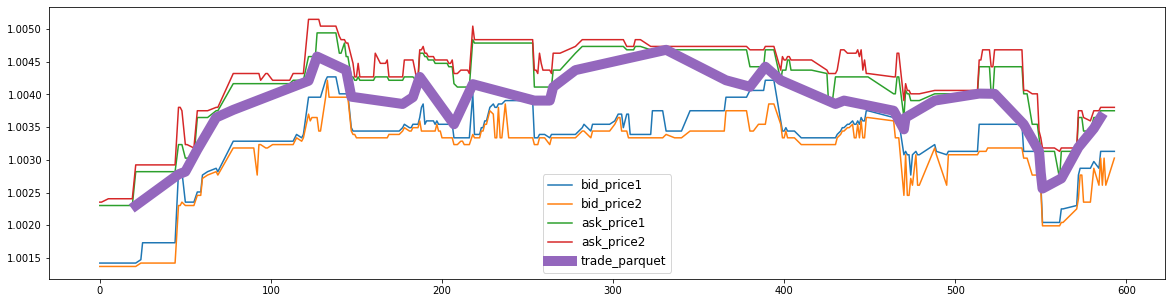

In [30]:
plt.figure(figsize=(20,5))
for i,a in enumerate(samples):
    plt.plot(book_test["seconds_in_bucket"],book_test[a],label=a)
plt.plot(trade_test['seconds_in_bucket'],trade_test["price"],label='trade_parquet',lw=10)
plt.legend(fontsize=12)

オーダーブックのbidとaskの間をうろうろしている

In [31]:
temp

,stock_id,mean,median,std,count,sum
0,0,0.004028,0.003180,0.002855,3830,15.429071
1,1,0.004362,0.003719,0.002433,3830,16.704962
2,2,0.002385,0.001748,0.002339,3830,9.133223
3,3,0.006182,0.005422,0.003201,3830,23.675414
4,4,0.004197,0.003397,0.002879,3830,16.073408
...,...,...,...,...,...,...
107,122,0.003762,0.003176,0.002300,3830,14.407997
108,123,0.002506,0.001967,0.001816,3830,9.599594
109,124,0.003691,0.003143,0.001953,3830,14.135579
110,125,0.002016,0.001575,0.001703,3830,7.719409


In [34]:
temp2 = temp[["stock_id","median"]]
temp2 = temp2.set_index('stock_id')

In [35]:
temp2

,median
stock_id,
0,0.003180
1,0.003719
2,0.001748
3,0.005422
4,0.003397
...,...
122,0.003176
123,0.001967
124,0.003143


In [36]:
temp_dict = temp2.to_dict()

In [38]:
temp_dict["median"][0]

0.00317963

In [39]:
sample['stock_id'] = [s.split('-')[0] for s in sample["row_id"]]

In [46]:
sample

,row_id,target
0,0-4,0.00318
1,0-32,0.00318
2,0-34,0.00318


In [41]:
sample['target'] = [temp_dict["median"][int(s)]for s in sample["stock_id"]]

In [45]:
sample.drop(['stock_id'],axis=1,inplace=True)

In [ ]:
# sample.to_csv('submission.csv',index=False)